Imports and Packages

In [113]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

 Example 1 - A simple cost function

 $$f(x) = x^2 + x + 1$$ 

In [114]:
def f(x):
    return x**2 + x + 1 

In [115]:
# Generating Data
x_1 = np.linspace(start=-3, stop=3, num=500)


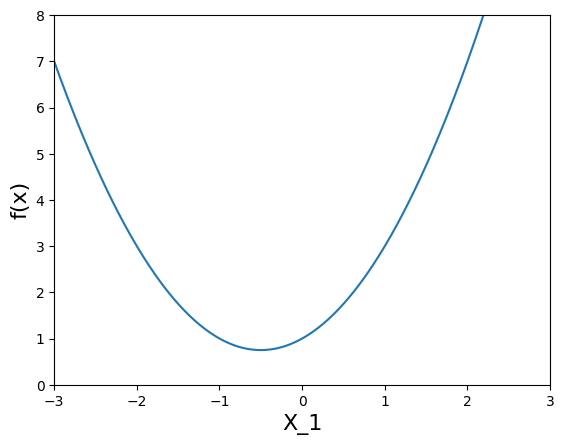

In [116]:
# Plot generated data - feed generated data through simple cost function and plot against x_1
plt.xlim([-3, 3])
plt.ylim([0,8])
plt.xlabel('X_1', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

Slope & Derivatives

In [117]:
def df(x):
    return 2*x + 1

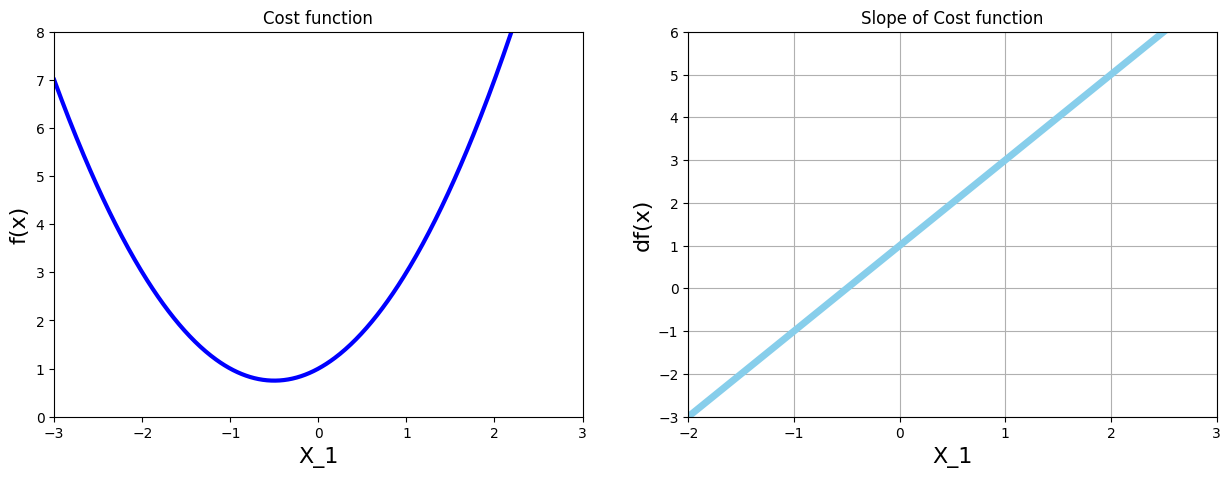

In [118]:
# Plot simple cost function and derivative of simple cost function side by side 

plt.figure(figsize=[15,5])

#Plot 1 - Simple Cost function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0,8)
plt.title('Cost function')
plt.xlabel('X_1', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#Plot 2 - Derivative 
plt.subplot(1, 2, 2)

plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of Cost function')
plt.xlabel('X_1', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()



Gradient Descent

In [119]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.000000001

x_list = [new_x]
slope_list = [df(new_x)]


for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print("loop ran this many times:", n)
        break

print("local minimum occurs at: ", new_x)
print("slope/df(x) value at this point is: ", df(new_x))
print("f(x) value or cost at this point is:", f(new_x))

loop ran this many times: 92
local minimum occurs at:  -0.49999999660032945
slope/df(x) value at this point is:  6.7993410901578955e-09
f(x) value or cost at this point is: 0.75


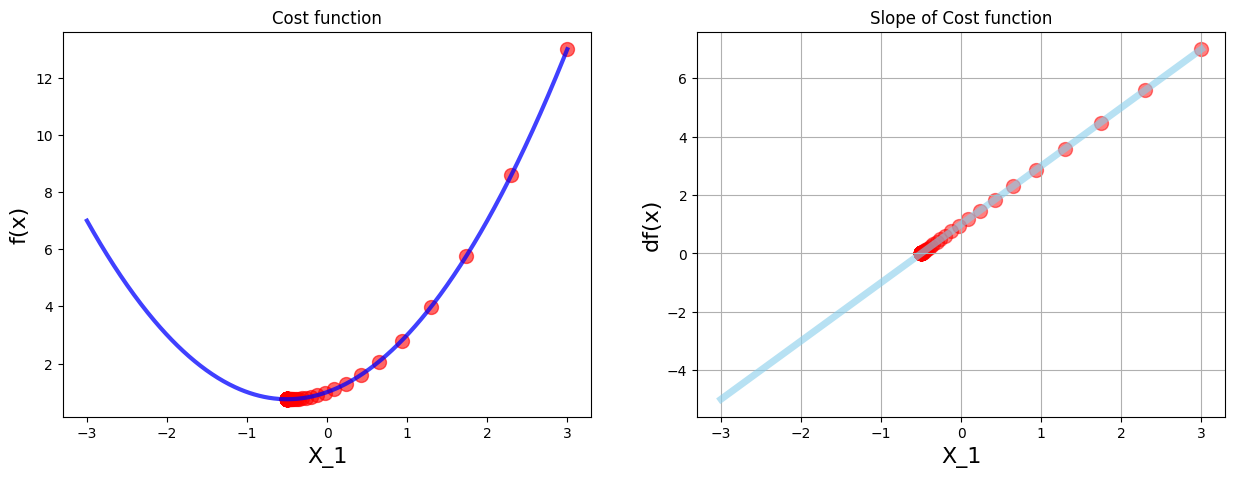

In [120]:
# Superimpose gradient descent calculations on simple cost function and derivative of simple cost function plot

plt.figure(figsize=[15,5])

#Plot 1 - Simple Cost function
plt.subplot(1, 2, 1)

# plt.xlim([-3, 3])
# plt.ylim(0,8)
plt.title('Cost function')
plt.xlabel('X_1', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.75)

new_x_values = np.array(x_list)

plt.scatter(x_list, f(new_x_values), color='red', s=100, alpha=0.6)

#Plot 2 - Derivative 
plt.subplot(1, 2, 2)

# plt.xlim(-2,3)
# plt.ylim(-3,6)
plt.grid()
plt.title('Slope of Cost function')
plt.xlabel('X_1', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)

plt.scatter(x_list, df(new_x_values), color='red', s=100, alpha=0.5)

plt.show()



Example 2 - Multiple Minima vs Initial Guess

$$g(x) = x^4 - 4x^2 + 5$$

In [121]:
# Generate data
x_2 = np.linspace(start=-2, stop=2, num=1000)

#Create g(x) function and dg(x) function
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

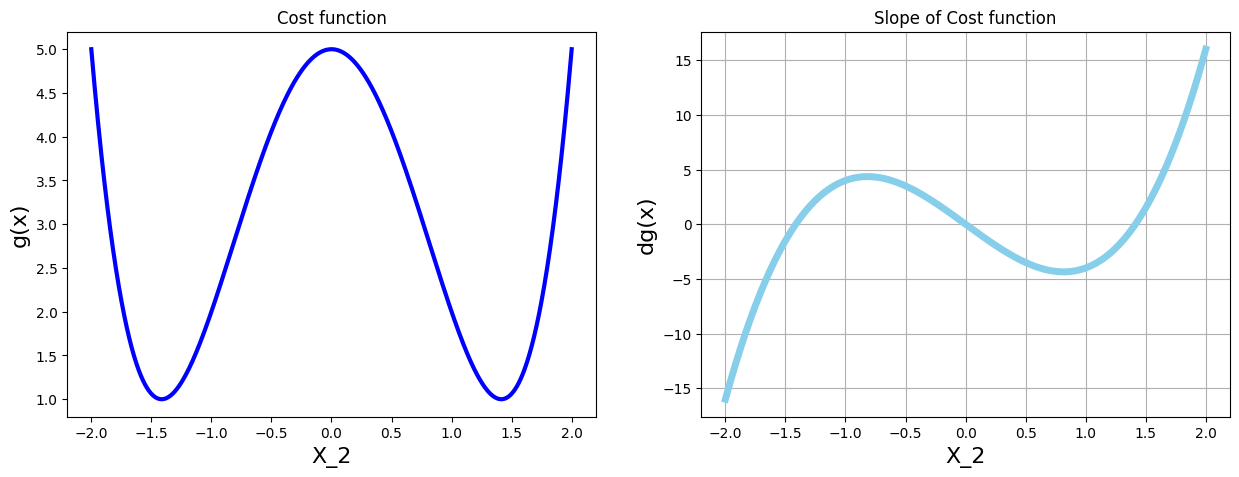

In [122]:
# Plot  cost function and derivative of cost function side by side 

plt.figure(figsize=[15,5])

#Plot 1 -  Cost function
plt.subplot(1, 2, 1)


plt.title('Cost function')
plt.xlabel('X_2', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

#Plot 2 - Derivative 
plt.subplot(1, 2, 2)


plt.grid()
plt.title('Slope of Cost function')
plt.xlabel('X_2', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()



Gradient Descent Function

In [123]:
def gradient_descent(derivative_func, initial_guess, muliplier=0.02, precision=0.001):

    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]


    for n in range(500):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - muliplier * gradient

        step_size = abs(new_x - previous_x)
        # print(step_size)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break

    return new_x, x_list, slope_list

In [141]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.01)

print("local minimum occurs at: ", local_min)
print("Number of steps:", len(list_x))
print("slope/dg(x) value at this point is: ", dg(local_min))
print("g(x) value or cost at this point is:", g(local_min))

local minimum occurs at:  1.412441857753588
Number of steps: 50
slope/dg(x) value at this point is:  -0.028294026625477642
g(x) value or cost at this point is: 1.0000250800486312


In [140]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, muliplier=0.01, precision=0.0001)

print("local minimum occurs at: ", local_min)
print("Number of steps:", len(list_x))
print("slope/dg(x) value at this point is: ", dg(local_min))
print("g(x) value or cost at this point is:", g(local_min))

local minimum occurs at:  -1.4137636556157256
Number of steps: 56
slope/dg(x) value at this point is:  0.007195073367222804
g(x) value or cost at this point is: 1.0000016188136027


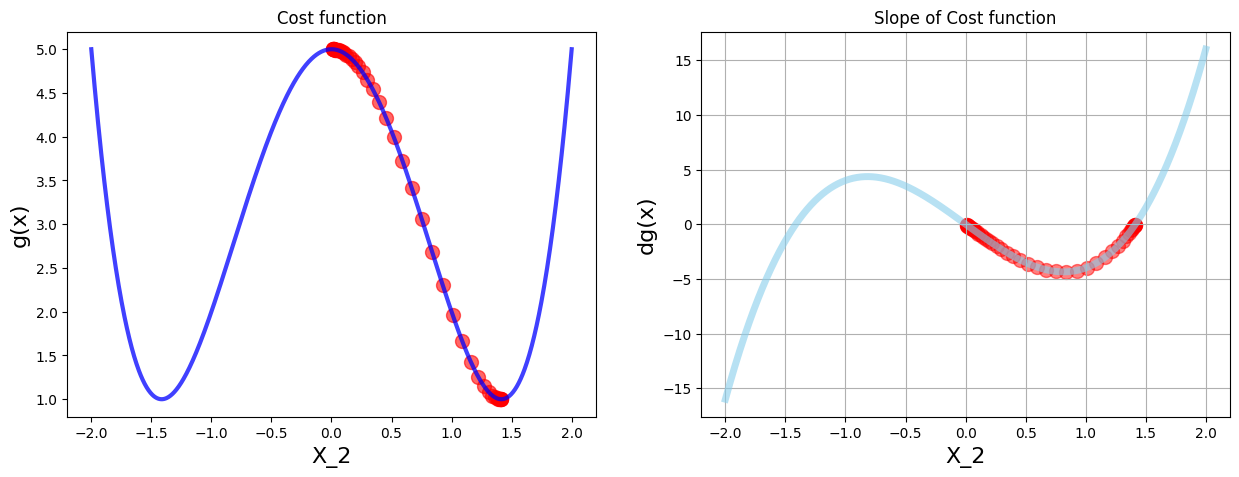

In [142]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.01)


# Superimpose gradient descent calculations on simple cost function and derivative of simple cost function plot
plt.figure(figsize=[15,5])

# Plot 1 - Simple Cost function
plt.subplot(1, 2, 1)

plt.title('Cost function')
plt.xlabel('X_2', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.75)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Plot 2 - Derivative 
plt.subplot(1, 2, 2)

plt.grid()
plt.title('Slope of Cost function')
plt.xlabel('X_2', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()



Divergence and overflow

$$h(x) = x^5 - 2x^4 + 2$$

In [ ]:
# Generate data
x_3 = np.linspace(start=-2.5, stop=2.5, num=100)

# Create h(x) function and dh(x) function

def h(x):
    return x**5 - 2*x**4 + 2

def gh(x):
    return 5*x**4 - 8*x**3 
